# Libraries


In [ ]:
!pip install lingam
!pip install tigramite
!pip install statsmodels
!pip install efficient-apriori

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.5/92.5 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.2/522.2 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 66.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
cupy-cuda11x 11.0.0 requires numpy<1.26,>=1.20, but you have numpy 1.26.2 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.1/273.1 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from efficient_apriori import apriori
from graphviz import Digraph
from google.colab import drive
from google.colab import files

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Read DataFrames

In [ ]:
tweets = pd.read_csv('/content/drive/My Drive/Universidad/5° año/Tesis/Climate_Change_Dataset/The Climate Change Twitter Dataset.csv')

tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15789411 entries, 0 to 15789410
Data columns (total 10 columns):
 #   Column           Dtype  
---  ------           -----  
 0   created_at       object 
 1   id               int64  
 2   lng              float64
 3   lat              float64
 4   topic            object 
 5   sentiment        float64
 6   stance           object 
 7   gender           object 
 8   temperature_avg  float64
 9   aggressiveness   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.2+ GB


In [ ]:
tweets.loc[(tweets['topic'] == 'Politics') & (tweets['aggressiveness'] == 'aggressive')].iloc[-20000:]

,created_at,id,lng,lat,topic,sentiment,stance,gender,temperature_avg,aggressiveness
15576320,2019-05-18 02:35:43+00:00,1129576267068727301,NaN,NaN,Politics,-0.523140,believer,male,NaN,aggressive
15576324,2019-05-18 02:35:47+00:00,1129576283451600896,NaN,NaN,Politics,-0.420971,believer,male,NaN,aggressive
15576333,2019-05-18 02:35:53+00:00,1129576308881657856,NaN,NaN,Politics,-0.420971,believer,male,NaN,aggressive
15576337,2019-05-18 02:36:00+00:00,1129576340070514688,-87.906470,43.038900,Politics,-0.420971,believer,female,6.367028,aggressive
15576340,2019-05-18 02:36:07+00:00,1129576367731945473,NaN,NaN,Politics,-0.420971,believer,female,NaN,aggressive
...,...,...,...,...,...,...,...,...,...,...
15789207,2019-10-01 01:28:56+00:00,1178844211983945728,NaN,NaN,Politics,-0.478265,neutral,female,NaN,aggressive
15789210,2019-10-01 01:32:39+00:00,1178845147326533632,NaN,NaN,Politics,-0.004224,believer,male,NaN,aggressive
15789224,2019-10-01 01:46:37+00:00,1178848662140653568,-77.494432,42.760168,Politics,-0.441758,believer,male,7.763954,aggressive
15789233,2019-10-01 02:00:36+00:00,1178852181157376000,NaN,NaN,Politics,-0.488772,believer,male,NaN,aggressive


In [ ]:
df = tweets
df['created_at'] = pd.to_datetime(df['created_at'])
df['topic'] = df['topic'].replace('Importance of Human Intervantion', 'Importance of Human Intervention')

years = df['created_at'].dt.year.unique()
topics = df['topic'].unique()
minSentiment = df['sentiment'].min()
maxSentiment = df['sentiment'].max()
stances = df['stance'].unique()
aggressiveness = df['aggressiveness'].unique()

print(f"Years: [{years.min()}, {years.max()}]")
print(f"Topics: {topics}")
print(f"Sentiments: [{round(minSentiment, 4)}, {round(maxSentiment, 4)}]")
print(f"Stances: {stances}")
print(f"Aggressiveness: {aggressiveness}")

Years: [2006, 2019]
Topics: ['Weather Extremes' 'Importance of Human Intervention'
 'Seriousness of Gas Emissions' 'Ideological Positions on Global Warming'
 'Impact of Resource Overconsumption' 'Global stance' 'Politics'
 'Significance of Pollution Awareness Events'
 'Donald Trump versus Science' 'Undefined / One Word Hashtags']
Sentiments: [-0.9942, 0.9917]
Stances: ['neutral' 'believer' 'denier']
Aggressiveness: ['aggressive' 'not aggressive']


In [ ]:
disasters = pd.read_csv('/content/drive/My Drive/Universidad/5° año/Tesis/Climate_Change_Dataset/disasters.csv')

disasters['start_date'] = pd.to_datetime(disasters['start_date'])
disasters['end_date'] = pd.to_datetime(disasters['end_date'])
disasters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4913 entries, 0 to 4912
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Disaster Type                    4913 non-null   object        
 1   Disaster Subtype                 4212 non-null   object        
 2   Disaster Group                   4913 non-null   object        
 3   Disaster Subgroup                4913 non-null   object        
 4   Event Name                       979 non-null    object        
 5   Origin                           2067 non-null   object        
 6   Country                          4913 non-null   object        
 7   Location                         4787 non-null   object        
 8   Latitude                         1290 non-null   float64       
 9   Longitude                        1294 non-null   float64       
 10  start_date                       4913 non-null   datetime64[

In [ ]:
print(f"Disaster Types: {disasters['Disaster Type'].unique()}")

print(f"Disaster Subtypes: {disasters['Disaster Subtype'].unique()}")

print(f"Dates : [{disasters['start_date'].min()}, {disasters['start_date'].max()}]")

Disaster Types: ['Earthquake' 'Storm' 'Flood' 'Volcanic activity' 'Landslide'
 'Extreme temperature' 'Wildfire' 'Drought' 'Mass movement (dry)']
Disaster Subtypes: ['Ground movement' 'Tropical cyclone' 'Flash flood' 'Riverine flood'
 'Ash fall' 'Tsunami' nan 'Convective storm' 'Landslide'
 'Extra-tropical storm' 'Severe winter conditions' 'Mudslide'
 'Coastal flood' 'Heat wave' 'Avalanche' 'Forest fire' 'Cold wave'
 'Drought' 'Land fire (Brush, Bush, Pasture)' 'Rockfall' 'Lava flow'
 'Pyroclastic flow']
Dates : [2007-01-01 00:00:00, 2020-12-30 00:00:00]


In [ ]:
tweets

,created_at,id,lng,lat,topic,sentiment,stance,gender,temperature_avg,aggressiveness
0,2006-06-06 16:06:42+00:00,6132,NaN,NaN,Weather Extremes,-0.097180,neutral,female,NaN,aggressive
1,2006-07-23 21:52:30+00:00,13275,-73.949582,40.650104,Weather Extremes,0.575777,neutral,undefined,-1.114768,aggressive
2,2006-08-29 01:52:30+00:00,23160,NaN,NaN,Weather Extremes,0.500479,neutral,male,NaN,aggressive
3,2006-11-07 02:46:52+00:00,57868,NaN,NaN,Weather Extremes,0.032816,neutral,male,NaN,aggressive
4,2006-11-27 14:27:43+00:00,304553,NaN,NaN,Importance of Human Intervention,-0.090428,neutral,male,NaN,aggressive
...,...,...,...,...,...,...,...,...,...,...
15789406,2019-10-01 05:50:32+00:00,1178910045783937024,NaN,NaN,Global stance,-0.010875,believer,male,NaN,not aggressive
15789407,2019-10-01 05:50:49+00:00,1178910117095305216,-118.243680,34.052230,Global stance,-0.685905,believer,female,-3.126811,not aggressive
15789408,2019-10-01 05:53:37+00:00,1178910821750992896,100.501440,13.753980,Politics,0.343705,neutral,female,-0.364467,not aggressive
15789409,2019-10-01 05:54:37+00:00,1178911073371643904,NaN,NaN,Politics,-0.088496,believer,female,NaN,not aggressive


In [ ]:
disasters

,Disaster Type,Disaster Subtype,Disaster Group,Disaster Subgroup,Event Name,Origin,Country,Location,Latitude,Longitude,start_date,end_date,Total Deaths,No Affected,Reconstruction Costs ('000 US$),Total Damages ('000 US$),CPI
0,Earthquake,Ground movement,Natural,Geophysical,NaN,NaN,Japan,"Nanao, Wajima districts (Isikawa province), Ni...",37.336,136.588,2007-03-25,2007-03-25,1.0,NaN,NaN,250000.0,81.101659
1,Storm,Tropical cyclone,Natural,Meteorological,Indhala,NaN,Madagascar,"Diana, Sava, Sofia, Analanjirofo provinces",-14.840,49.940,2007-03-15,2007-03-17,80.0,203182.0,NaN,240000.0,81.101659
2,Flood,Flash flood,Natural,Hydrological,NaN,Storms and heavy rains,Australia,"Gosford, Dungog, Newcastle, Wyong, Port Stephe...",-32.870,151.380,2007-06-08,2007-06-12,9.0,5000.0,NaN,1300000.0,81.101659
3,Flood,Riverine flood,Natural,Hydrological,NaN,Heavy rains,Haiti,"Ferrier village (Fort Liberte district, Nord E...",19.410,-71.780,2007-03-26,2007-03-30,14.0,15000.0,NaN,NaN,81.101659
4,Flood,Riverine flood,Natural,Hydrological,NaN,Heavy rains,Argentina,"Tucuman, Santiago del Estero, Salta, Formosa p...",NaN,NaN,2007-01-18,2007-03-20,5.0,60000.0,NaN,30000.0,81.101659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4908,Flood,NaN,Natural,Hydrological,NaN,NaN,Congo (the Democratic Republic of the),"Bukavu, Uvira (South Kivu)",NaN,NaN,2020-04-16,2020-05-18,52.0,92500.0,NaN,NaN,NaN
4909,Flood,NaN,Natural,Hydrological,NaN,Heavy rains,Zambia,"Gwembe, Siavonga, Mambwe and Lumezi districts",NaN,NaN,2020-01-01,2020-01-28,NaN,1500.0,NaN,NaN,NaN
4910,Flood,NaN,Natural,Hydrological,NaN,Heavy rains,Zambia,"Samfya, Mushindamo, Nakonde districts (Luapula...",NaN,NaN,2020-03-20,2020-03-26,NaN,1500.0,NaN,NaN,NaN
4911,Flood,Riverine flood,Natural,Hydrological,NaN,Heavy rains,Timor-Leste,"Cristo Rei, Nain Feto, Dom Aleixo, and Vera Cr...",NaN,NaN,2020-03-13,2020-03-13,NaN,9124.0,NaN,20000.0,NaN


In [ ]:
disasters

,Disaster Type,Disaster Subtype,Disaster Group,Disaster Subgroup,Event Name,Origin,Country,Location,Latitude,Longitude,start_date,end_date,Total Deaths,No Affected,Reconstruction Costs ('000 US$),Total Damages ('000 US$),CPI
0,Earthquake,Ground movement,Natural,Geophysical,NaN,NaN,Japan,"Nanao, Wajima districts (Isikawa province), Ni...",37.336,136.588,2007-03-25,2007-03-25,1.0,NaN,NaN,250000.0,81.101659
1,Storm,Tropical cyclone,Natural,Meteorological,Indhala,NaN,Madagascar,"Diana, Sava, Sofia, Analanjirofo provinces",-14.840,49.940,2007-03-15,2007-03-17,80.0,203182.0,NaN,240000.0,81.101659
2,Flood,Flash flood,Natural,Hydrological,NaN,Storms and heavy rains,Australia,"Gosford, Dungog, Newcastle, Wyong, Port Stephe...",-32.870,151.380,2007-06-08,2007-06-12,9.0,5000.0,NaN,1300000.0,81.101659
3,Flood,Riverine flood,Natural,Hydrological,NaN,Heavy rains,Haiti,"Ferrier village (Fort Liberte district, Nord E...",19.410,-71.780,2007-03-26,2007-03-30,14.0,15000.0,NaN,NaN,81.101659
4,Flood,Riverine flood,Natural,Hydrological,NaN,Heavy rains,Argentina,"Tucuman, Santiago del Estero, Salta, Formosa p...",NaN,NaN,2007-01-18,2007-03-20,5.0,60000.0,NaN,30000.0,81.101659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4908,Flood,NaN,Natural,Hydrological,NaN,NaN,Congo (the Democratic Republic of the),"Bukavu, Uvira (South Kivu)",NaN,NaN,2020-04-16,2020-05-18,52.0,92500.0,NaN,NaN,NaN
4909,Flood,NaN,Natural,Hydrological,NaN,Heavy rains,Zambia,"Gwembe, Siavonga, Mambwe and Lumezi districts",NaN,NaN,2020-01-01,2020-01-28,NaN,1500.0,NaN,NaN,NaN
4910,Flood,NaN,Natural,Hydrological,NaN,Heavy rains,Zambia,"Samfya, Mushindamo, Nakonde districts (Luapula...",NaN,NaN,2020-03-20,2020-03-26,NaN,1500.0,NaN,NaN,NaN
4911,Flood,Riverine flood,Natural,Hydrological,NaN,Heavy rains,Timor-Leste,"Cristo Rei, Nain Feto, Dom Aleixo, and Vera Cr...",NaN,NaN,2020-03-13,2020-03-13,NaN,9124.0,NaN,20000.0,NaN


# Plots

In [ ]:
def normalize(value, min_val, max_val):
    return (value - min_val) / (max_val - min_val)

def truncateNumber(number, digits):
    magnitude = 10 ** (len(str(number)) - digits)
    return int(number / magnitude) * magnitude

def plotTweets(year=None, topics=None, groupBy="week", stances=None, aggressiveness=None):
    dfToPlot = df

    ## Filter dataframe to plot
    if not topics is None:
        dfToPlot = dfToPlot.loc[dfToPlot['topic'].isin(topics)]
    if not year is None:
        dfToPlot = dfToPlot.loc[dfToPlot['created_at'].dt.year == year]
    elif groupBy != "topic":
        groupBy = "year"
    if not stances is None:
        dfToPlot = dfToPlot.loc[dfToPlot['stance'].isin(stances)]
    if not aggressiveness is None:
        dfToPlot = dfToPlot.loc[dfToPlot['aggressiveness'].isin(aggressiveness)]

    if groupBy == "topic":
        dfGrouped = dfToPlot.groupby(dfToPlot["topic"])
    elif groupBy == "year":
        dfGrouped = dfToPlot.groupby(dfToPlot["created_at"].dt.year)
    elif groupBy == "month":
        dfGrouped = dfToPlot.groupby(dfToPlot["created_at"].dt.month)
    elif groupBy == "week":
        dfGrouped = dfToPlot.groupby(dfToPlot["created_at"].dt.isocalendar().week)
    else:
        dfGrouped = dfToPlot.groupby(dfToPlot["created_at"].dt.dayofyear)

    marker = "o" if groupBy == "topic" else ""
    linestyle = "" if groupBy == "topic" else "-"
    rotation = 90 if groupBy == "topic" else 0


    ## Plot number of tweets
    numberOfTweets = dfGrouped["id"].count()
    numberOfTweetsNormalized = normalize(numberOfTweets, 0, truncateNumber(numberOfTweets.max(), 2))
    plt.bar(numberOfTweetsNormalized.index, numberOfTweetsNormalized.values, width=1, color="0.8", label="Number of Tweets")

    ## Plot average sentiment
    averageSentiment = dfGrouped.sentiment.mean()
    averageSentimentNormalized = normalize(averageSentiment, -1, 1)
    plt.plot(averageSentimentNormalized, color="blue", marker=marker, linestyle=linestyle, label="Sentiment")

    ## Plot aggressiveness
    aggressivenessPercentages = dfGrouped["aggressiveness"].value_counts(normalize=True)
    aggressiveTweetsPercentages = aggressivenessPercentages.loc[aggressivenessPercentages.index.get_level_values('aggressiveness') == 'aggressive']
    aggressiveTweetsPercentages = aggressiveTweetsPercentages.reset_index(level='aggressiveness', drop=True)
    plt.plot(aggressiveTweetsPercentages, color="red", marker=marker, linestyle=linestyle, label="Aggressiveness")

    ## Plot deniers
    stancePercentages = dfGrouped["stance"].value_counts(normalize=True)
    stanceTweetsPercentages = stancePercentages.loc[stancePercentages.index.get_level_values('stance') == 'denier']
    stanceTweetsPercentages = stanceTweetsPercentages.reset_index(level='stance', drop=True)
    plt.plot(stanceTweetsPercentages, color="green", marker=marker, linestyle=linestyle, label="Deniers")

    ## Customize ticks
    max_value = truncateNumber(dfGrouped["id"].count().max(), 2)
    if max_value > 10:
      tick_interval = max_value * 0.2
      tick_positions = np.arange(0, max_value + tick_interval, tick_interval)
      tick_labels = ["{:,}".format(int(tick)) for tick in tick_positions]
      plt.yticks(np.arange(0, 1.1, 0.2), tick_labels)
    else:
      plt.yticks(np.arange(0, 1.1, 1), [0, int(max_value)])

    ## Customize labels
    plt.xlabel(groupBy.capitalize())
    plt.xticks(rotation=rotation)
    plt.ylabel("Number of Tweets")
    plt.title("Tweets" + ((" " + str(year)) if year else "") + ((" (" + ', '.join(topics) + ")") if topics else "") + ((" (" + ', '.join([word.capitalize() + 's' for word in stances]) + ")") if stances else "") + ((" (" + ', '.join([word.capitalize() for word in aggressiveness]) + ")") if aggressiveness else ""))

    plt.legend()

    ## Add horizontal lines
    for i in range(11):
        plt.axhline(y=i * 0.1, color='0.7', linestyle='--', linewidth=0.7)

    # Add ticks for the right side of the Y-axis
    right_tick_positions = np.arange(0, 1.1, 0.2)
    right_tick_labels = ["{}%".format(int(tick * 100)) for tick in right_tick_positions]
    ax2 = plt.gca().twinx()
    ax2.set_yticks(np.arange(0, 1.1, 0.2) * 0.951 / (dfGrouped["id"].count().max() / max_value))
    ax2.set_yticklabels(right_tick_labels)
    ax2.tick_params(axis='y', which='both', length=0)
    ax2.set_ylabel('Sentiment, Aggressiveness and Deniers')

    ## Show
    plt.show()

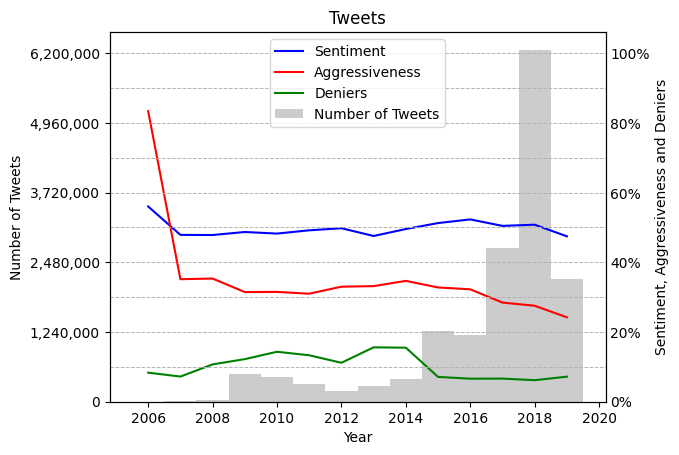

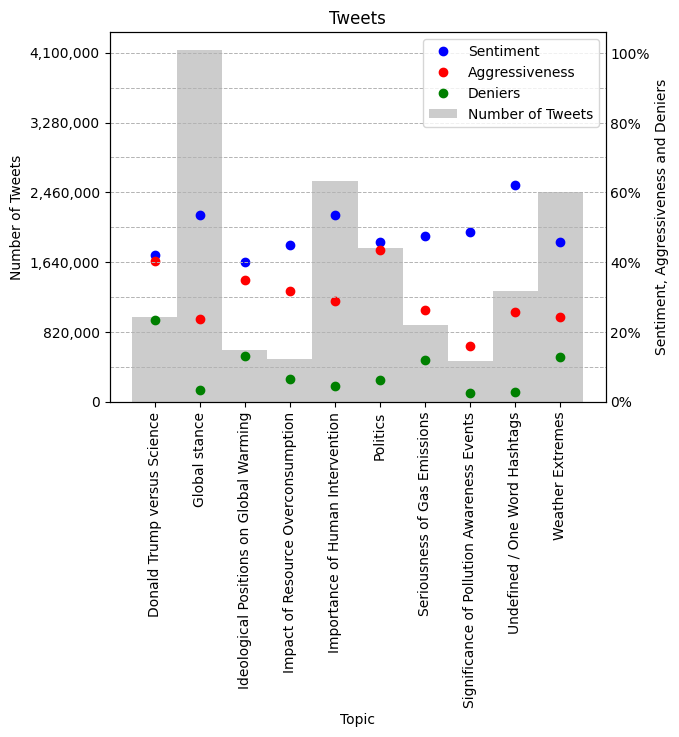

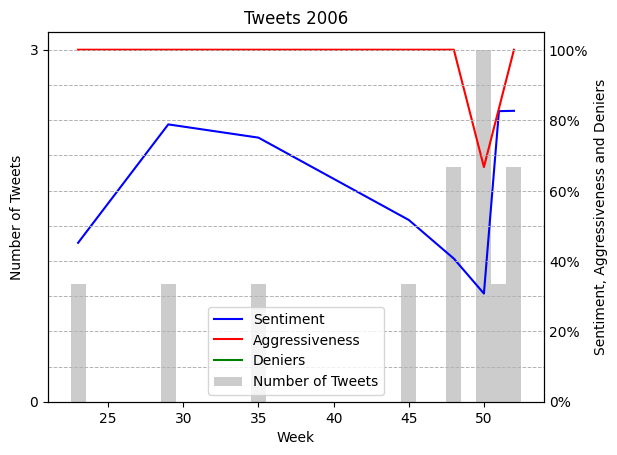

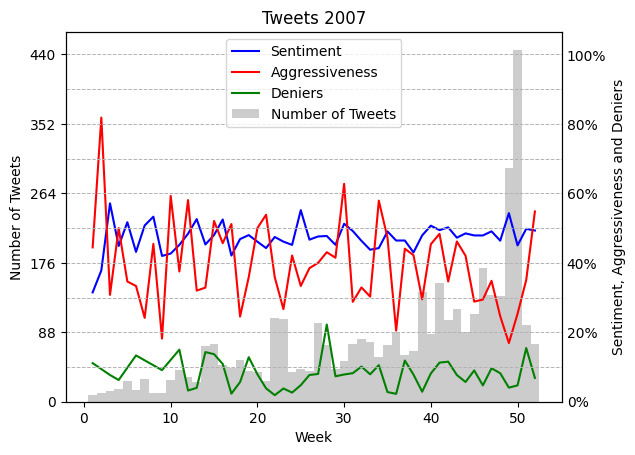

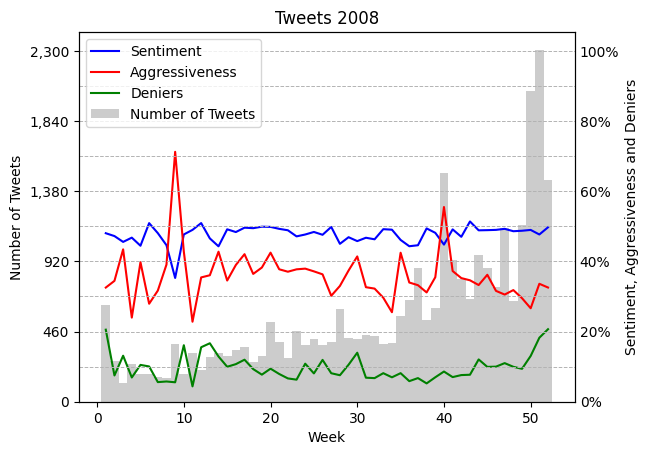

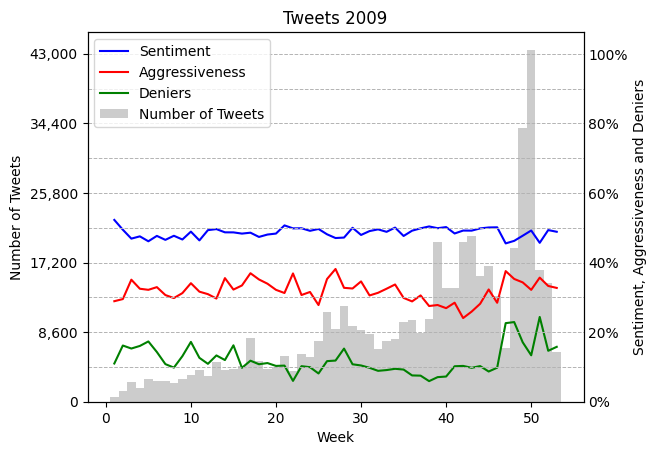

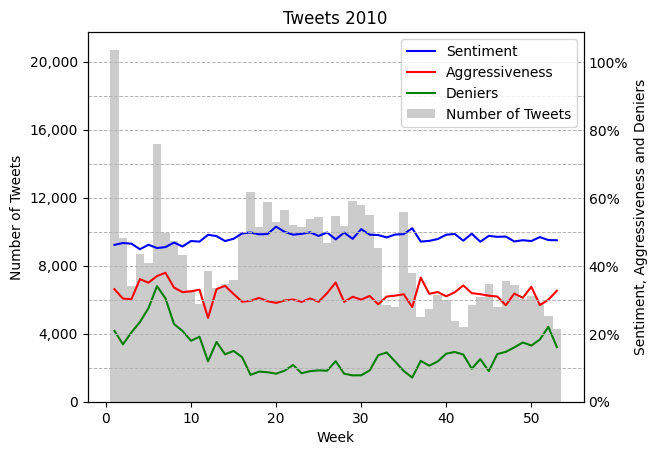

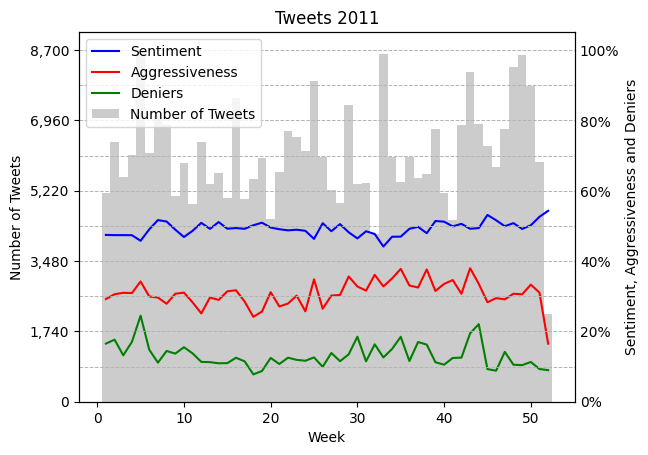

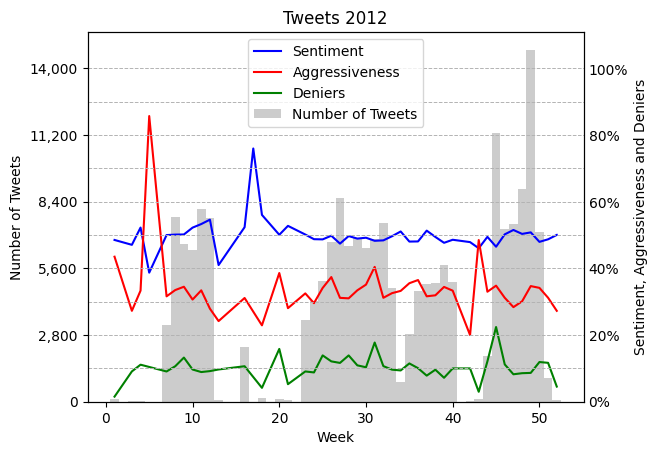

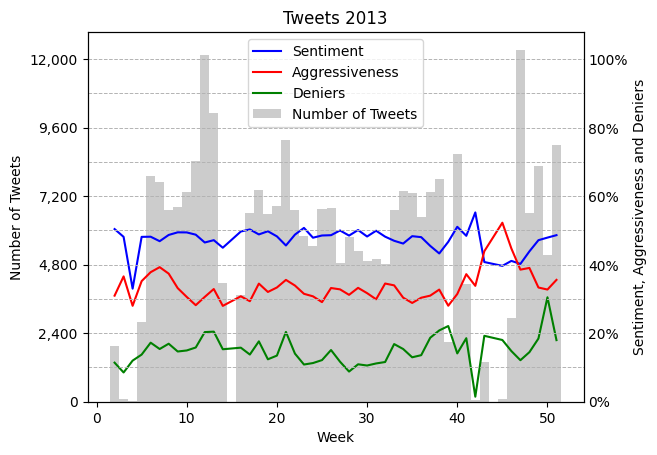

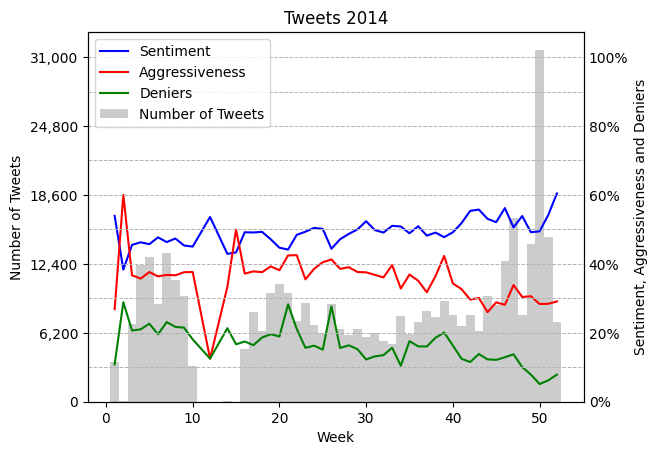

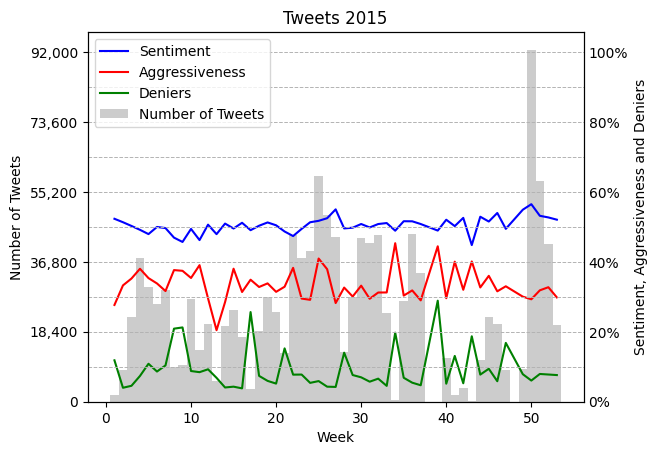

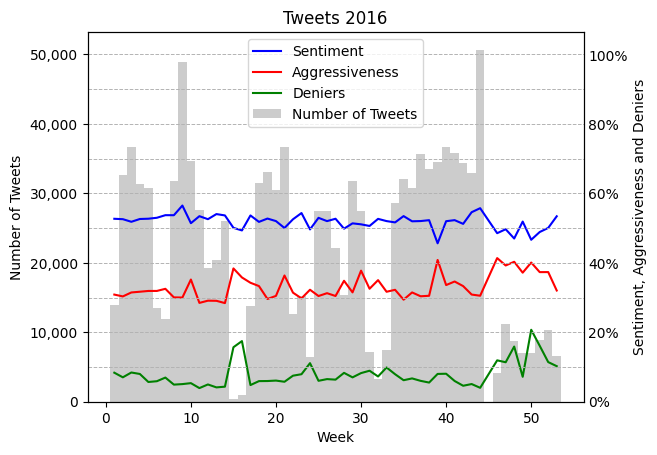

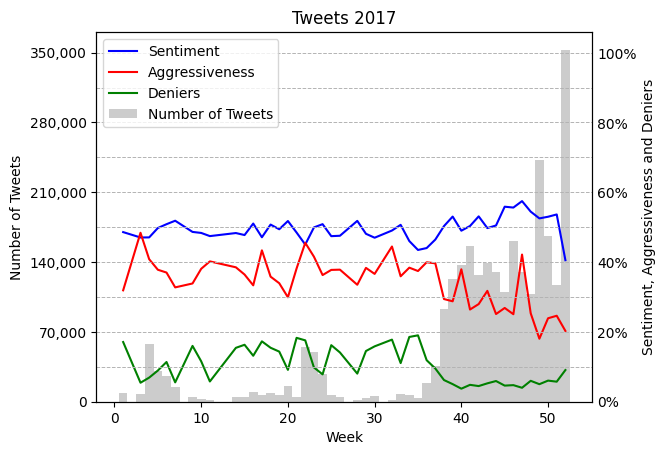

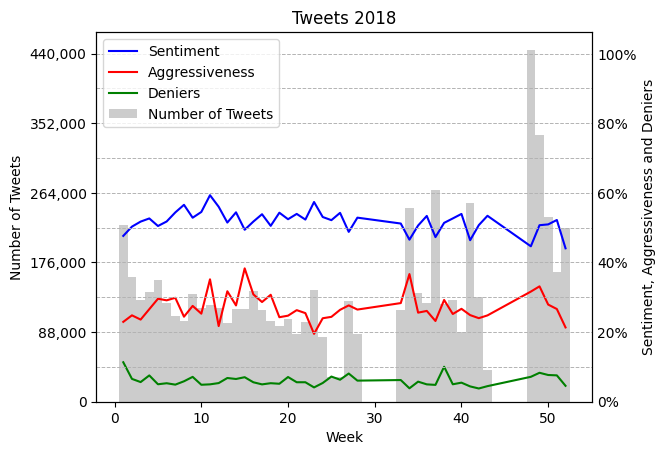

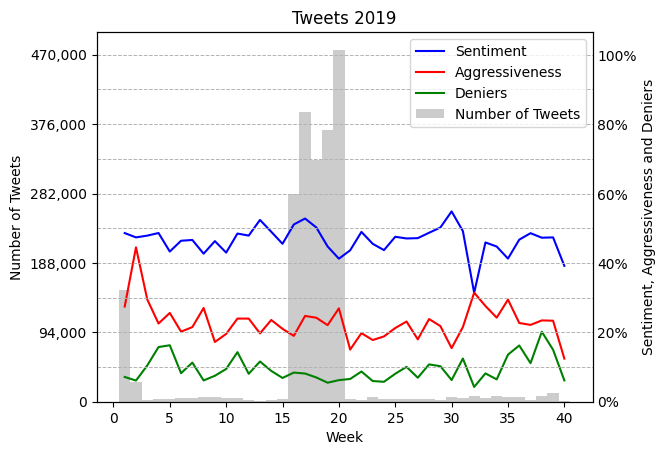

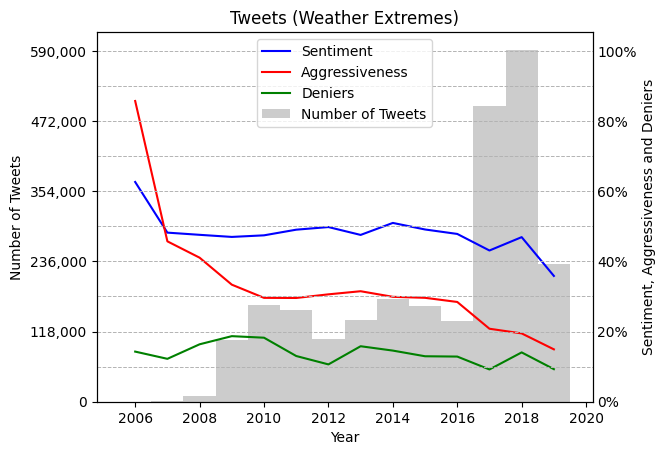

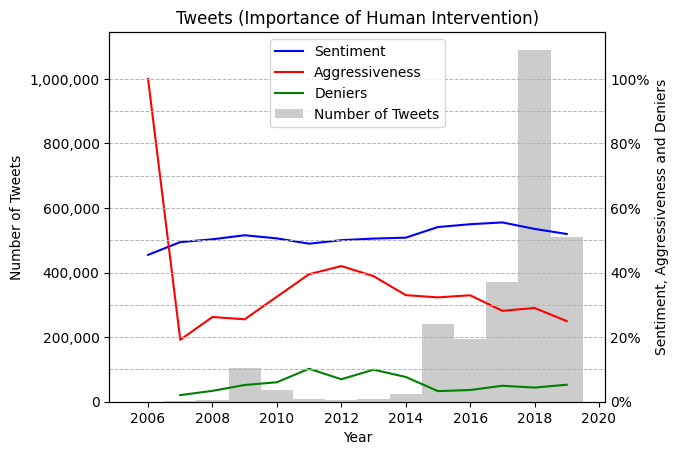

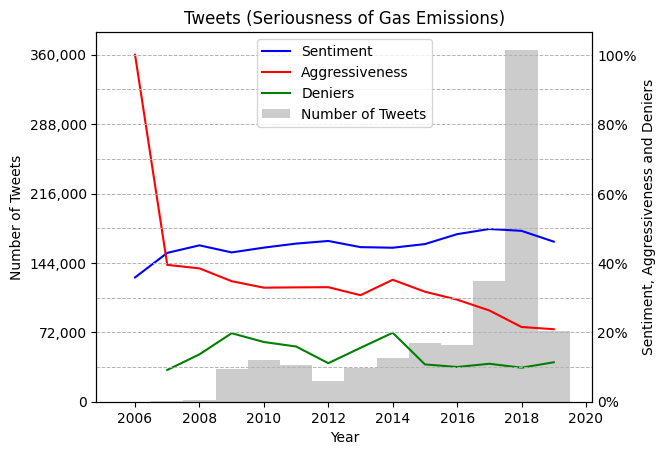

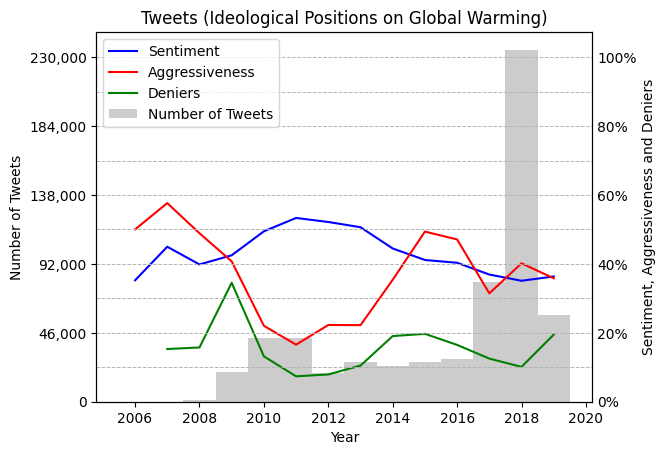

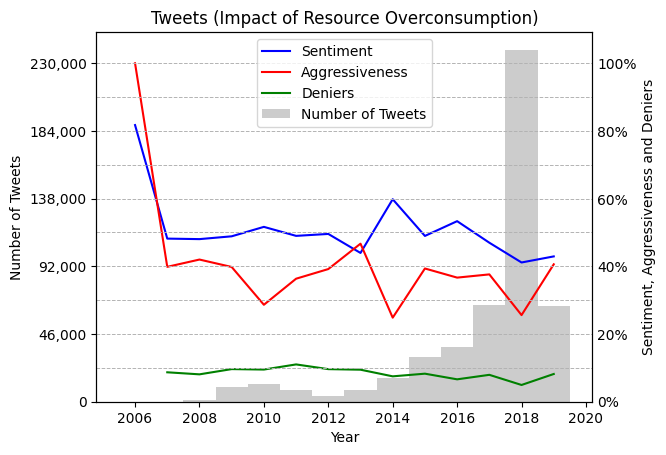

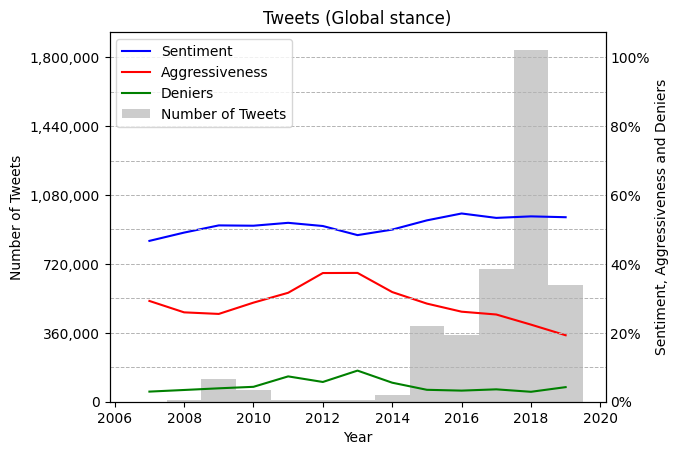

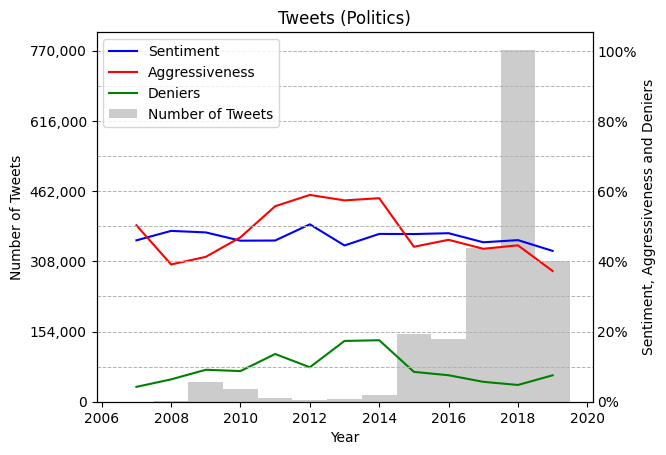

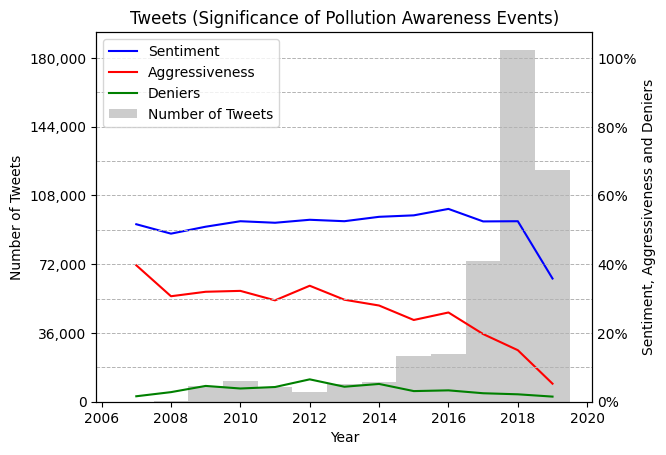

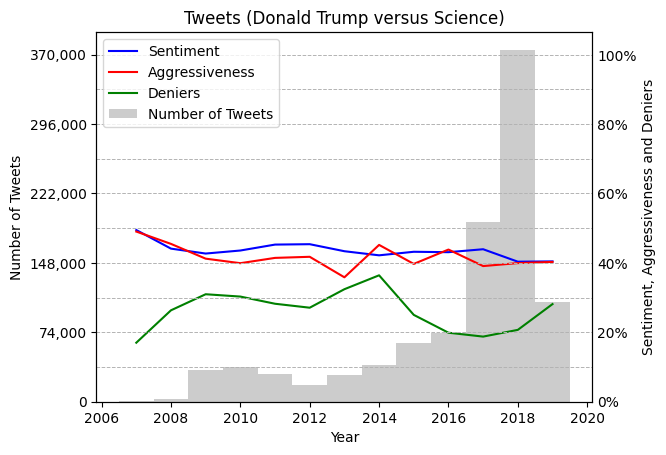

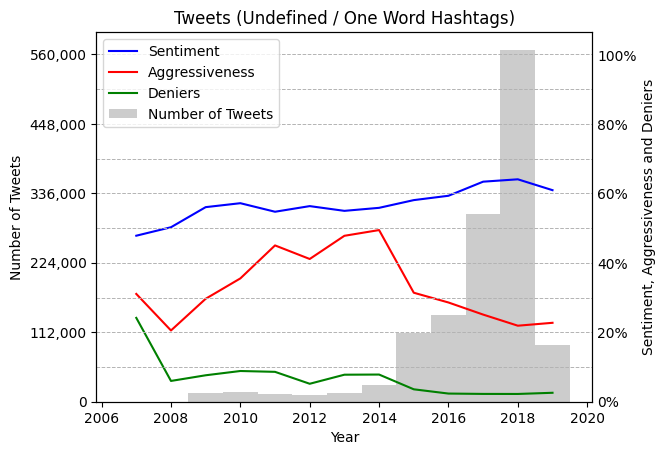

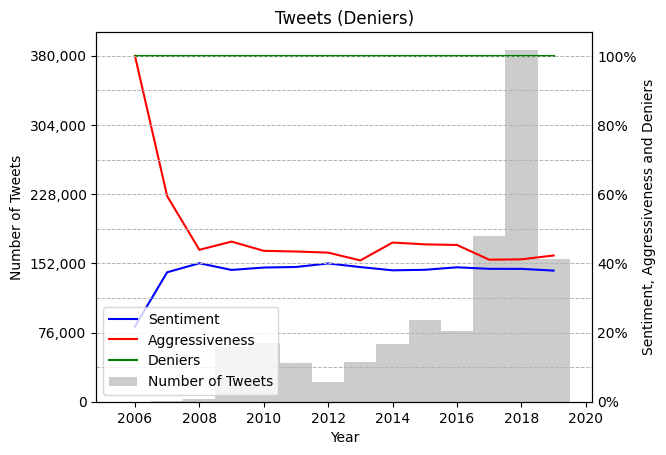

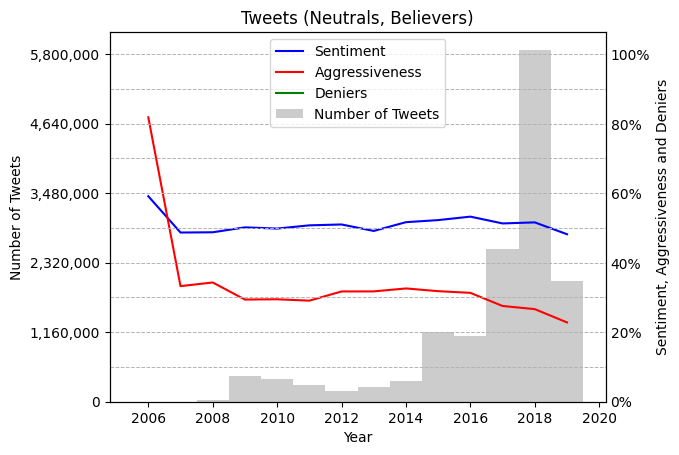

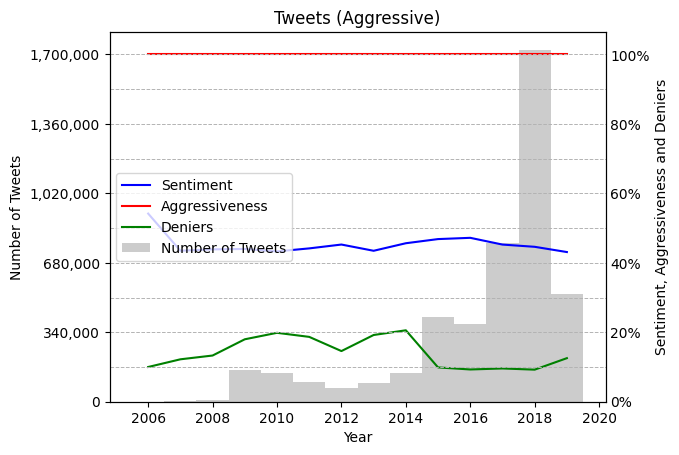

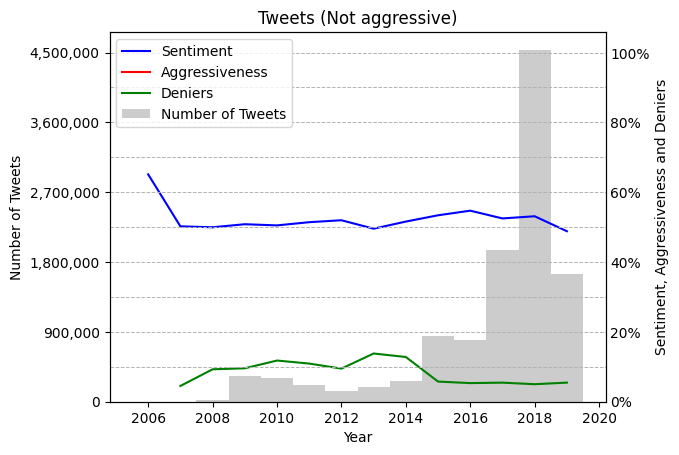

In [ ]:
def generatePlots():
    ## General
    plotTweets()
    plotTweets(groupBy="topic")

    ## Years
    for year in years:
        plotTweets(year=year)

    ## Topics
    for topic in topics:
        plotTweets(topics=[topic])

    ## Deniers vs Not Deniers
    plotTweets(stances=["denier"])
    plotTweets(stances=["neutral", "believer"])

    ## Aggressive vs Not Aggressive
    plotTweets(aggressiveness=["aggressive"])
    plotTweets(aggressiveness=["not aggressive"])

generatePlots()

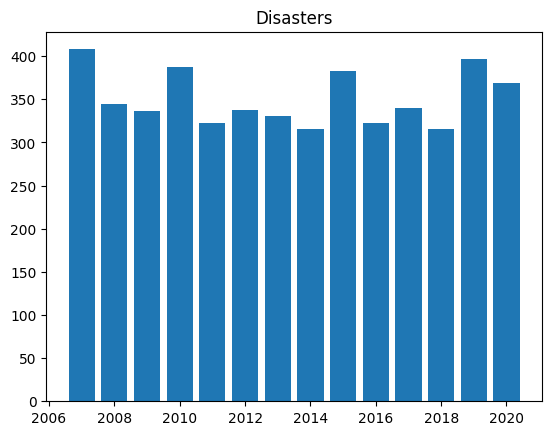

In [ ]:
def plot_disasters(df):

  disastersGrouped = df.groupby(df["start_date"].dt.year)
  numberOfDisasters = disastersGrouped["Disaster Type"].count()

  plt.bar(numberOfDisasters.index, numberOfDisasters.values)
  plt.title("Disasters")
  plt.show()

plot_disasters(disasters)

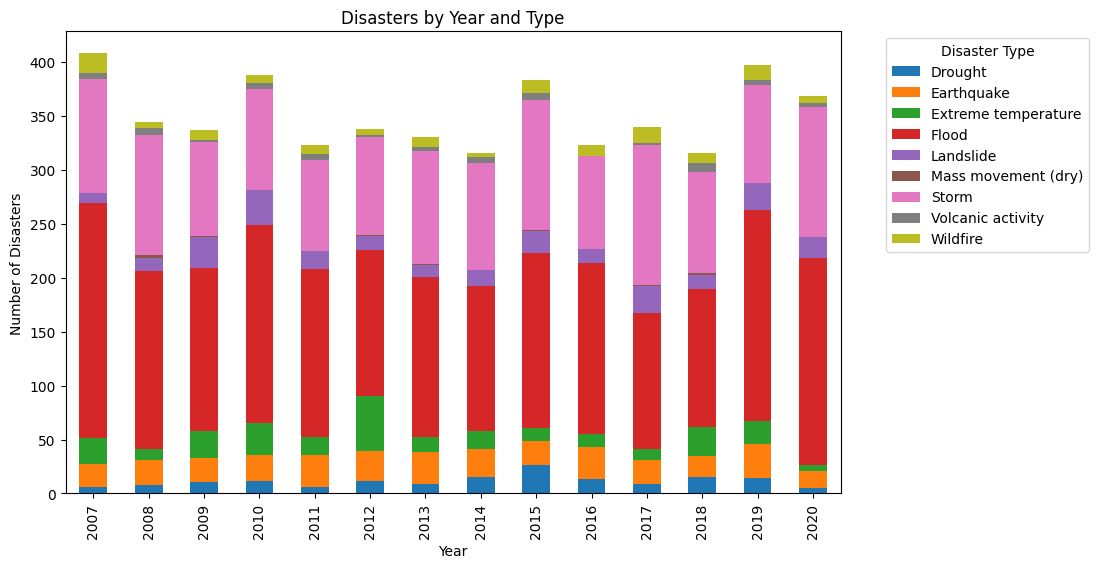

In [ ]:
def plot_disasters(df):

  # disastersGrouped = df.groupby(df["start_date"].dt.year)
  # numberOfDisasters = disastersGrouped["Disaster Type"].count()

  disastersGrouped = df.groupby([df["start_date"].dt.year, "Disaster Type"]).size().unstack(fill_value=0)
  disastersGrouped.plot.bar(stacked=True, figsize=(10, 6))

  plt.title("Disasters by Year and Type")
  plt.xlabel("Year")
  plt.ylabel("Number of Disasters")
  plt.legend(title='Disaster Type', bbox_to_anchor=(1.05, 1), loc='upper left')
  plt.show()

plot_disasters(disasters)

In [ ]:
disasters['duration'] = disasters['end_date'] - disasters['start_date']
disasters.describe()

,Latitude,Longitude,Total Deaths,No Affected,Reconstruction Costs ('000 US$),Total Damages ('000 US$),CPI,duration
count,1290.000000,1294.000000,3583.000000,3.213000e+03,1.600000e+01,1.755000e+03,4544.000000,4913
mean,19.328011,41.045957,203.965113,7.411172e+05,1.301854e+06,1.205278e+06,90.401750,18 days 09:56:45.088540606
std,88.671570,123.322345,4737.270923,7.419144e+06,2.859664e+06,6.787299e+06,5.716723,66 days 04:06:05.490227938
min,-913.908000,-955.370000,1.000000,2.000000e+00,1.510000e+03,2.000000e+00,81.101659,-125 days +00:00:00
25%,-0.011000,-4.675000,4.000000,2.500000e+03,6.000000e+04,2.248000e+04,85.292061,0 days 00:00:00
50%,17.483500,48.765000,12.000000,1.500000e+04,1.970000e+05,1.368200e+05,91.120794,3 days 00:00:00
75%,34.770750,103.951000,30.000000,1.027170e+05,1.091438e+06,6.475000e+05,93.878436,9 days 00:00:00
max,995.267000,952.600000,222570.000000,3.300000e+08,1.150000e+07,2.100000e+08,100.000000,1488 days 00:00:00


In [ ]:
disasters

# Filter

In [ ]:
del df['lat']
del df['lng']
del df['gender']
del df['temperature_avg']

In [ ]:
filteredTweetsDF = df.loc[df['created_at'].dt.year >= 2007]
filteredTweetsDF = filteredTweetsDF.loc[filteredTweetsDF['topic'] != "Undefined / One Word Hashtags"]
#filteredTweetsDF['[O] sentiment'] = filteredTweetsDF['sentiment'].copy()
filteredTweetsDF['sentiment'] = filteredTweetsDF['sentiment'].apply(lambda x: "Positive Sentiment" if x >= 0.35 else ("Negative Sentiment" if x <= -0.35 else "Neutral Sentiment"))

filteredDisastersDF = disasters.loc[disasters['start_date'].dt.year >= 2007]
filteredDisastersDF = filteredDisastersDF.loc[filteredDisastersDF['end_date'].dt.year <= 2019]
filteredDisastersDF['duration'] = (filteredDisastersDF['end_date'] - filteredDisastersDF['start_date']).apply(lambda x: max(1.0, x / pd.Timedelta(days=1)))
filteredDisastersDF = filteredDisastersDF.loc[~filteredDisastersDF['Disaster Type'].isin(['Earthquake', 'Volcanic activity', 'Landslide', 'Mass movement (dry)'])]
filteredDisastersDF = filteredDisastersDF.loc[(filteredDisastersDF['Total Deaths'] / filteredDisastersDF['duration'] > 35) |
                                              (filteredDisastersDF['No Affected'] / filteredDisastersDF['duration'] > 400000) |
                                              (filteredDisastersDF["Total Damages ('000 US$)"] / filteredDisastersDF['duration'] > 400000)]

In [ ]:
filteredTweetsDF

,created_at,id,topic,sentiment,stance,aggressiveness
12,2007-01-06 17:36:51+00:00,2266613,Weather Extremes,Negative Sentiment,neutral,aggressive
13,2007-01-06 18:08:03+00:00,2268453,Weather Extremes,Neutral Sentiment,neutral,not aggressive
14,2007-01-07 22:44:24+00:00,2332873,Weather Extremes,Negative Sentiment,neutral,aggressive
15,2007-01-08 17:46:45+00:00,2377823,Impact of Resource Overconsumption,Negative Sentiment,neutral,aggressive
16,2007-01-09 16:43:09+00:00,2464013,Global stance,Negative Sentiment,neutral,aggressive
...,...,...,...,...,...,...
15789406,2019-10-01 05:50:32+00:00,1178910045783937024,Global stance,Neutral Sentiment,believer,not aggressive
15789407,2019-10-01 05:50:49+00:00,1178910117095305216,Global stance,Negative Sentiment,believer,not aggressive
15789408,2019-10-01 05:53:37+00:00,1178910821750992896,Politics,Neutral Sentiment,neutral,not aggressive
15789409,2019-10-01 05:54:37+00:00,1178911073371643904,Politics,Neutral Sentiment,believer,not aggressive


In [ ]:
filteredDisastersDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401 entries, 1 to 4529
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Disaster Type                    401 non-null    object        
 1   Disaster Subtype                 370 non-null    object        
 2   Disaster Group                   401 non-null    object        
 3   Disaster Subgroup                401 non-null    object        
 4   Event Name                       177 non-null    object        
 5   Origin                           98 non-null     object        
 6   Country                          401 non-null    object        
 7   Location                         397 non-null    object        
 8   Latitude                         61 non-null     float64       
 9   Longitude                        62 non-null     float64       
 10  start_date                       401 non-null    datetime64[n

In [ ]:
filteredDisastersDF.describe()

,Latitude,Longitude,Total Deaths,No Affected,Reconstruction Costs ('000 US$),Total Damages ('000 US$),CPI,duration
count,61.000000,62.000000,364.000000,2.590000e+02,3.000000e+00,3.300000e+02,401.000000,401.000000
mean,28.498461,46.232742,705.274725,5.497171e+06,7.205837e+05,3.100331e+06,90.824236,5.436409
std,33.132093,73.674443,7823.805042,2.478399e+07,6.484497e+05,8.298830e+06,5.562248,36.983599
min,-25.100000,-109.640000,1.000000,2.700000e+01,1.830000e+05,1.000000e+03,81.101659,1.000000
25%,17.570000,-0.257500,10.000000,4.089200e+04,3.605000e+05,4.050000e+05,85.292061,1.000000
50%,27.976000,73.440000,41.000000,4.160000e+05,5.380000e+05,1.000000e+06,91.120794,1.000000
75%,36.070000,106.795000,96.750000,2.100000e+06,9.893755e+05,2.500000e+06,95.878166,3.000000
max,247.532000,149.220000,138366.000000,3.300000e+08,1.440751e+06,9.500000e+07,100.000000,727.000000


# Discretize and Group

In [ ]:
def discretizeTweets(df, granularity="day"):
    topicThreshold = 0.25
    sentimentThreshold = 0.4
    aggressivenesThreshold = 0.4
    deniersThreshold = 0.2

    df['date'] = df['created_at']

    if granularity == "day":
        dfGrouped = df.groupby(df['date'].dt.date)
    elif granularity == "week":
        dfGrouped = df.groupby(df['date'].dt.to_period('W'))
    else:
        dfGrouped = df.groupby(df['date'].dt.to_period('M'))

    sentimentPercentages = dfGrouped["sentiment"].value_counts(normalize=True)
    positiveSentimentPercentages = sentimentPercentages.loc[sentimentPercentages.index.get_level_values('sentiment') == 'Positive Sentiment']
    positiveSentimentPercentages = positiveSentimentPercentages.reset_index(level='sentiment', drop=True)
    negativeSentimentPercentages = sentimentPercentages.loc[sentimentPercentages.index.get_level_values('sentiment') == 'Negative Sentiment']
    negativeSentimentPercentages = negativeSentimentPercentages.reset_index(level='sentiment', drop=True)

    stancePercentages = dfGrouped["stance"].value_counts(normalize=True)
    deniersPercentages = stancePercentages.loc[stancePercentages.index.get_level_values('stance') == 'denier']
    deniersPercentages = deniersPercentages.reset_index(level='stance', drop=True)

    aggressivenessPercentages = dfGrouped["aggressiveness"].value_counts(normalize=True)
    aggressiveTweetsPercentages = aggressivenessPercentages.loc[aggressivenessPercentages.index.get_level_values('aggressiveness') == 'aggressive']
    aggressiveTweetsPercentages = aggressiveTweetsPercentages.reset_index(level='aggressiveness', drop=True)


    topicsPercentages = dfGrouped["topic"].value_counts(normalize=True)

    discreteTopics = {}
    for topic in topics:
        topicPercentages = topicsPercentages.loc[topicsPercentages.index.get_level_values('topic') == topic]
        topicPercentages = topicPercentages.reset_index(level='topic', drop=True)
        discreteTopics[topic] = topicPercentages > topicThreshold

    discretePositiveSentiment = positiveSentimentPercentages > sentimentThreshold
    discreteNegativeSentiment = negativeSentimentPercentages > sentimentThreshold
    discreteDeniers = deniersPercentages > deniersThreshold
    discreteAggressiveness = aggressiveTweetsPercentages > aggressivenesThreshold

    discreteDF = pd.DataFrame({
        "Positive Sentiment": discretePositiveSentiment,
        "Negative Sentiment": discreteNegativeSentiment,
        "Deniers": discreteDeniers,
        "Aggressiveness": discreteAggressiveness,
        "[T] Weather Extremes": discreteTopics["Weather Extremes"],
        "[T] Importance of Human Intervention": discreteTopics["Importance of Human Intervention"],
        "[T] Seriousness of Gas Emissions": discreteTopics["Seriousness of Gas Emissions"],
        "[T] Ideological Positions on Global Warming": discreteTopics["Ideological Positions on Global Warming"],
        "[T] Impact of Resource Overconsumption": discreteTopics["Impact of Resource Overconsumption"],
        "[T] Global stance": discreteTopics["Global stance"],
        "[T] Politics": discreteTopics["Politics"],
        "[T] Significance of Pollution Awareness Events": discreteTopics["Significance of Pollution Awareness Events"],
        "[T] Donald Trump versus Science": discreteTopics["Donald Trump versus Science"]
    })

    discreteDF = discreteDF.fillna(False)
    discreteDF = discreteDF.astype(float)
    #discreteDF = discreteDF.reset_index(level='date', drop=False)
    if granularity != "day":
      discreteDF.index = discreteDF.index.to_timestamp() + pd.DateOffset(days=-1)
    return discreteDF

#discreteTweetsDF = discretizeTweets(filteredTweetsDF, granularity="week")
#discreteTweetsDF.head()

#discretizeTweets(filteredTweetsDF, granularity="week")

In [ ]:
def individual_tweets_to_tuples(df):
    result = []

    for index, row in df.iterrows():
        result.append(tuple(x for x in (
            "Positive Sentiment" if row["sentiment"] == "Positive Sentiment" else None,
            "Neutral Sentiment" if row["sentiment"] == "Neutral Sentiment" else None,
            "Negative Sentiment" if row["sentiment"] == "Negative Sentiment" else None,
            "Denier" if row["stance"] == "denier" else None,
            "Believer" if row["stance"] == "believer" else None,
            "Neutral" if row["stance"] == "neutral" else None,
            "Aggressive" if row["aggressiveness"] == "aggressive" else None,
            "Not Aggressive" if row["aggressiveness"] == "not aggressive" else None,
            "[T] Weather Extremes" if row["topic"] == "Weather Extremes" else None,
            "[T] Importance of Human Intervention" if row["topic"] == "Importance of Human Intervention" else None,
            "[T] Seriousness of Gas Emissions" if row["topic"] == "Seriousness of Gas Emissions" else None,
            "[T] Ideological Positions on Global Warming" if row["topic"] == "Ideological Positions on Global Warming" else None,
            "[T] Impact of Resource Overconsumption" if row["topic"] == "Impact of Resource Overconsumption" else None,
            "[T] Global stance" if row["topic"] == "Global stance" else None,
            "[T] Politics" if row["topic"] == "Politics" else None,
            "[T] Significance of Pollution Awareness Events" if row["topic"] == "Significance of Pollution Awareness Events" else None,
            "[T] Donald Trump versus Science" if row["topic"] == "Donald Trump versus Science" else None
        ) if x != None))

    return result


# def grouped_tweets_to_tuples(df):
#     result = []
#     #TODO variables pendientes (neutral, believer, etc.)
#     for index, row in df.iterrows():
#         result.append(tuple(x for x in (
#             "Positive Sentiment" if row["Positive Sentiment"] else None,
#             "Negative Sentiment" if row["Negative Sentiment"] else None,
#             "Deniers" if row["Deniers"] else None,
#             "Aggressiveness" if row["Aggressiveness"] else None,
#             "[T] Weather Extremes" if row["[T] Weather Extremes"] else None,
#             "[T] Importance of Human Intervention" if row["[T] Importance of Human Intervention"] else None,
#             "[T] Seriousness of Gas Emissions" if row["[T] Seriousness of Gas Emissions"] else None,
#             "[T] Ideological Positions on Global Warming" if row["[T] Ideological Positions on Global Warming"] else None,
#             "[T] Impact of Resource Overconsumption" if row["[T] Impact of Resource Overconsumption"] else None,
#             "[T] Global stance" if row["[T] Global stance"] else None,
#             "[T] Politics" if row["[T] Politics"] else None,
#             "[T] Significance of Pollution Awareness Events" if row["[T] Significance of Pollution Awareness Events"] else None,
#             "[T] Donald Trump versus Science" if row["[T] Donald Trump versus Science"] else None
#         ) if x != None))

#     return result


In [ ]:
# def individual_tweets_to_tuples(df):
#     df = df[['sentiment', 'aggressiveness', 'stance', 'topic']]
#     df['aggressiveness'] = df['aggressiveness'].copy().str.title()
#     df['stance'] = df['stance'].copy().str.title()
#     df['topic'] = '[T] ' + df['topic']

#     return [tuple(row) for index, row in df.iterrows()]

# individual_tweets_to_tuples(filteredTweetsDF)

In [ ]:
filteredTweetsDF.head(100)

,created_at,id,topic,sentiment,stance,aggressiveness
12,2007-01-06 17:36:51+00:00,2266613,Weather Extremes,Negative Sentiment,neutral,aggressive
13,2007-01-06 18:08:03+00:00,2268453,Weather Extremes,Neutral Sentiment,neutral,not aggressive
14,2007-01-07 22:44:24+00:00,2332873,Weather Extremes,Negative Sentiment,neutral,aggressive
15,2007-01-08 17:46:45+00:00,2377823,Impact of Resource Overconsumption,Negative Sentiment,neutral,aggressive
16,2007-01-09 16:43:09+00:00,2464013,Global stance,Negative Sentiment,neutral,aggressive
...,...,...,...,...,...,...
108,2007-02-14 20:23:12+00:00,5507294,Weather Extremes,Negative Sentiment,neutral,not aggressive
109,2007-02-14 22:40:43+00:00,5510092,Weather Extremes,Negative Sentiment,believer,aggressive
110,2007-02-15 13:00:53+00:00,5519348,Importance of Human Intervention,Neutral Sentiment,believer,not aggressive
111,2007-02-15 13:01:38+00:00,5519358,Importance of Human Intervention,Neutral Sentiment,believer,not aggressive


In [ ]:
def discretize_disasters(filteredDisastersDF, granularity="day"):
  min_date = filteredDisastersDF['start_date'].min()
  max_date = filteredDisastersDF['end_date'].max()
  date_range = pd.date_range(min_date, max_date)


  new_df = pd.DataFrame({'date': date_range})
  new_df.set_index('date', inplace=True)


  for _, row in filteredDisastersDF.iterrows():
    disaster_type = row['Disaster Type']
    start_date = row['start_date']
    end_date = row['end_date']

    # Iterate through the dates within the disaster's date range
    for date in pd.date_range(start_date, end_date):
        new_df.at[date, disaster_type] = 1

  new_df.fillna(0, inplace=True)

  new_df.columns = ['[D] ' + column_name for column_name in new_df.columns]

  if granularity != "day":
    df = new_df.reset_index('date')

    if granularity == "week":
        dfGrouped = df.groupby(df['date'].dt.to_period('W'))
    else:
        dfGrouped = df.groupby(df['date'].dt.to_period('M'))

    discreteDF = pd.DataFrame({
        "[D] Storm": dfGrouped["[D] Storm"].sum() > 0,
        "[D] Flood": dfGrouped["[D] Flood"].sum() > 0,
        "[D] Extreme temperature": dfGrouped["[D] Extreme temperature"].sum() > 0,
        "[D] Wildfire": dfGrouped["[D] Wildfire"].sum() > 0,
        "[D] Drought": dfGrouped["[D] Drought"].sum() > 0
    })

    discreteDF = discreteDF.fillna(False)
    discreteDF = discreteDF.astype(float)
    discreteDF.index = discreteDF.index.to_timestamp() + pd.DateOffset(days=-1)
    return discreteDF
  else:
    return new_df

In [ ]:
discreteDailyTweets = discretizeTweets(filteredTweetsDF, granularity="day")
discreteWeeklyTweets = discretizeTweets(filteredTweetsDF, granularity="week")

discreteDailyDisasters = discretize_disasters(filteredDisastersDF, granularity="day")
discreteWeeklyDisasters = discretize_disasters(filteredDisastersDF, granularity="week")

discreteDailyTweetsAndDisasters = discreteDailyTweets.merge(discreteDailyDisasters, left_index=True, right_index=True, how="outer").fillna(0.0)
discreteWeeklyTweetsAndDisasters = discreteWeeklyTweets.merge(discreteWeeklyDisasters, left_index=True, right_index=True, how="outer").fillna(0.0)

<ipython-input-29-ae679c37b2c4>:12: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  dfGrouped = df.groupby(df['date'].dt.to_period('W'))


# Frequent Itemsets and Association Rules

In [ ]:
import pickle

tweets_tuples_path = "/content/drive/My Drive/Universidad/5° año/Tesis/Climate_Change_Dataset/tweets_tuples.pkl"

read_tuples_from_file = True
save_tuples_to_file = False

if read_tuples_from_file:
  with open(tweets_tuples_path, 'rb') as file:
    tweets_tuples = pickle.load(file)
else:
  tweets_tuples = individual_tweets_to_tuples(filteredTweetsDF)
  if save_tuples_to_file:
    with open(tweets_tuples_path, 'wb') as file:
        pickle.dump(tweets_tuples, file)

In [ ]:
tweets_tuples

[('Negative Sentiment', 'Neutral', 'Aggressive', '[T] Weather Extremes'),
 ('Neutral Sentiment', 'Neutral', 'Not Aggressive', '[T] Weather Extremes'),
 ('Negative Sentiment', 'Neutral', 'Aggressive', '[T] Weather Extremes'),
 ('Negative Sentiment',
  'Neutral',
  'Aggressive',
  '[T] Impact of Resource Overconsumption'),
 ('Negative Sentiment', 'Neutral', 'Aggressive', '[T] Global stance'),
 ('Negative Sentiment', 'Neutral', 'Aggressive', '[T] Global stance'),
 ('Negative Sentiment', 'Neutral', 'Aggressive', '[T] Global stance'),
 ('Negative Sentiment', 'Neutral', 'Aggressive', '[T] Global stance'),
 ('Neutral Sentiment', 'Neutral', 'Aggressive', '[T] Global stance'),
 ('Neutral Sentiment', 'Neutral', 'Aggressive', '[T] Global stance'),
 ('Neutral Sentiment', 'Neutral', 'Aggressive', '[T] Global stance'),
 ('Neutral Sentiment',
  'Believer',
  'Not Aggressive',
  '[T] Importance of Human Intervention'),
 ('Negative Sentiment', 'Neutral', 'Aggressive', '[T] Weather Extremes'),
 ('Positi

In [ ]:
itemsets, rules = apriori(tweets_tuples, min_support=0.01, min_confidence=0.35)

In [ ]:
def rules_to_df(rules):
  df = pd.DataFrame(
      [(rule.lhs, rule.rhs, len(rule.lhs) + len(rule.rhs), rule.confidence, rule.support, rule.lift, rule.conviction) for rule in rules],
      columns = ["lhs", "rhs", "size", "confidence", "support", "lift", "conviction"]
  )

  return df.sort_values(by="confidence", ascending=0)

def itemsets_to_df(itemsets):
  max_size = max(itemsets.keys())
  df = pd.DataFrame(
      [(itemSet, size, ocurrences / len(tweets_tuples)) for size in range(1, max_size + 1) for itemSet, ocurrences in itemsets[size].items()],
      columns = ["itemset", "size", "support"]
  )

  return df.sort_values(by="support", ascending=0)

df_rules = rules_to_df(rules)
df_itemsets = itemsets_to_df(itemsets)

In [ ]:
df_itemsets.loc[df_itemsets['size'] == 3][["itemset", "support"]]

,itemset,support
131,"(Believer, Neutral Sentiment, Not Aggressive)",0.208299
141,"(Believer, Not Aggressive, [T] Global stance)",0.183370
139,"(Believer, Not Aggressive, Positive Sentiment)",0.164495
122,"(Believer, Negative Sentiment, Not Aggressive)",0.137705
144,"(Believer, Not Aggressive, [T] Importance of H...",0.103854
...,...,...
154,"(Denier, Negative Sentiment, [T] Weather Extre...",0.010591
137,"(Believer, Neutral Sentiment, [T] Significance...",0.010545
165,"(Negative Sentiment, Not Aggressive, [T] Signi...",0.010482
126,"(Believer, Negative Sentiment, [T] Impact of R...",0.010436


In [ ]:
df_itemsets.loc[df_itemsets['size'] == 2][["itemset", "support"]]

,itemset,support
33,"(Believer, Not Aggressive)",0.510499
70,"(Neutral Sentiment, Not Aggressive)",0.292965
32,"(Believer, Neutral Sentiment)",0.287980
36,"(Believer, [T] Global stance)",0.236000
80,"(Not Aggressive, Positive Sentiment)",0.221291
...,...,...
63,"(Neutral, [T] Donald Trump versus Science)",0.012590
78,"(Neutral Sentiment, [T] Significance of Pollut...",0.012553
58,"(Negative Sentiment, [T] Significance of Pollu...",0.012211
65,"(Neutral, [T] Ideological Positions on Global ...",0.011346


In [ ]:
def filter_itemsets(df_itemsets):
  excluded_values = ["Believer", "Not Aggressive", "Neutral Sentiment"]
  def filter_function(row):
      return all(item not in excluded_values for item in row["itemset"])
  return df_itemsets[df_itemsets.apply(filter_function, axis=1)]

df_itemsets_filtered = filter_itemsets(df_itemsets)

In [ ]:
df_itemsets_filtered.loc[df_itemsets_filtered['size'] == 2][["itemset", "support"]]

,itemset,support
19,"(Aggressive, Negative Sentiment)",0.115586
91,"(Positive Sentiment, [T] Global stance)",0.101410
24,"(Aggressive, [T] Global stance)",0.067584
52,"(Negative Sentiment, [T] Global stance)",0.066119
69,"(Neutral, [T] Weather Extremes)",0.065017
59,"(Negative Sentiment, [T] Weather Extremes)",0.063298
62,"(Neutral, Positive Sentiment)",0.063153
92,"(Positive Sentiment, [T] Importance of Human I...",0.061731
20,"(Aggressive, Neutral)",0.059241
49,"(Negative Sentiment, Neutral)",0.058037


In [ ]:
df_itemsets_filtered.loc[df_itemsets_filtered['size'] == 3][["itemset", "support"]]

,itemset,support
108,"(Aggressive, Negative Sentiment, [T] Global st...",0.021833
110,"(Aggressive, Negative Sentiment, [T] Politics)",0.021659
179,"(Neutral, Positive Sentiment, [T] Weather Extr...",0.021057
106,"(Aggressive, Negative Sentiment, Neutral)",0.020432
104,"(Aggressive, Denier, Negative Sentiment)",0.018524
111,"(Aggressive, Negative Sentiment, [T] Weather E...",0.018026
158,"(Negative Sentiment, Neutral, [T] Weather Extr...",0.017940
120,"(Aggressive, Positive Sentiment, [T] Global st...",0.017923
109,"(Aggressive, Negative Sentiment, [T] Importanc...",0.016516
115,"(Aggressive, Neutral, [T] Weather Extremes)",0.015891


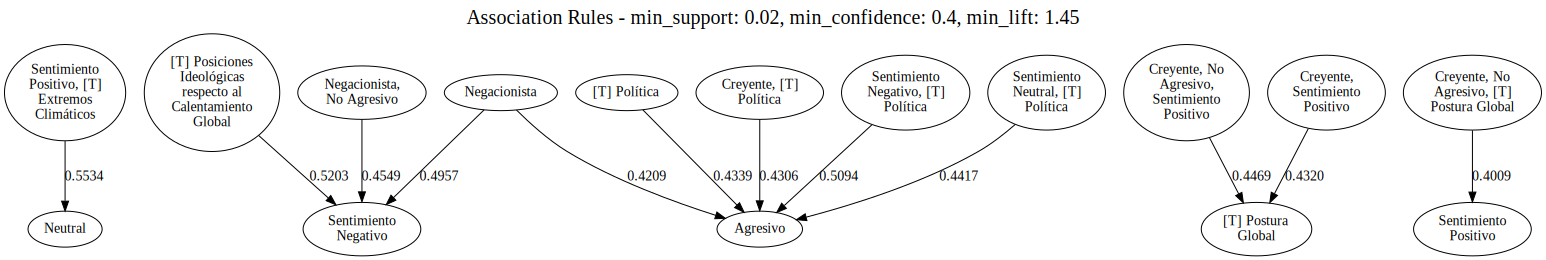

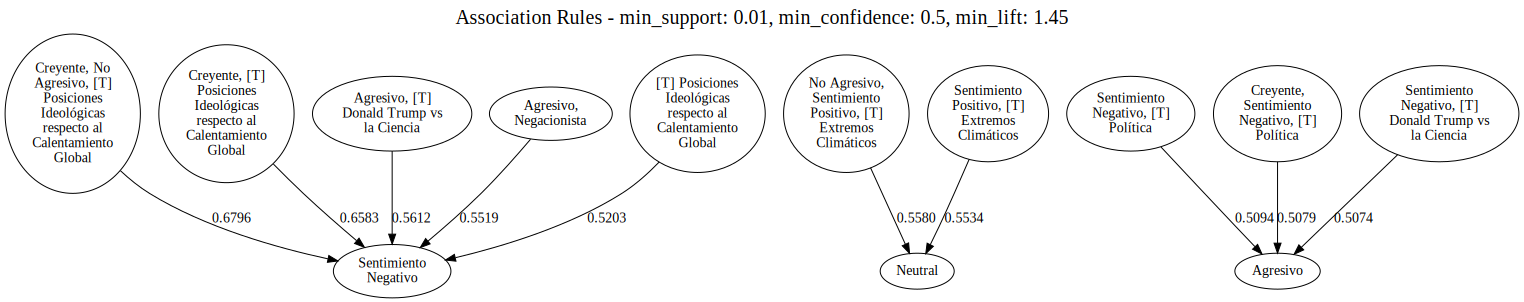

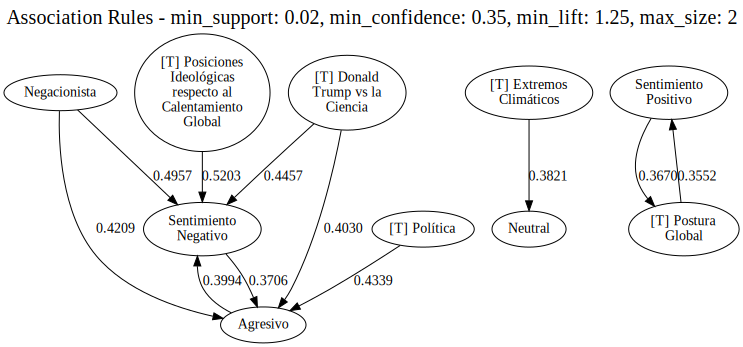

In [ ]:
def split_label(label, max_length=16):
    #label = ", ".join([translate(term) for term in label.split(", ")])
    words = label.split()
    lines = []
    current_line = ""
    for word in words:
        if len(current_line) + len(word) + 1 <= max_length:
            current_line += " " + word
        else:
            lines.append(current_line.strip())
            current_line = word
    if current_line:
        lines.append(current_line.strip())
    return "\n".join(lines)

def plot_rules(df_rules, max_size=100, min_support=0.02, min_confidence=0.4, min_lift=1):
    dot = Digraph()
    title = f"Association Rules - min_support: {min_support}, min_confidence: {min_confidence}, min_lift: {min_lift}{f', max_size: {max_size}' if max_size != 100 else ''}"
    dot.attr(label=title, labelloc='t', fontsize="20")
    for _, rule in df_rules.iterrows():
        if (rule["size"] <= max_size) and (rule["support"] >= min_support) and (rule["confidence"] >= min_confidence) and (rule["lift"] > min_lift):
          src = split_label(', '.join([str(item) for item in rule["lhs"]]))
          dst = split_label(', '.join([str(item) for item in rule["rhs"]]))
          dot.node(src)
          dot.node(dst)
          dot.edge(src, dst, color="black", label="{:.4f}".format(rule["confidence"]))
    display(dot)

plot_rules(df_rules, min_lift=1.45)
plot_rules(df_rules, min_support=0.01, min_confidence=0.5, min_lift=1.45)
plot_rules(df_rules, max_size=2, min_confidence=0.35, min_lift=1.25)

# Causal Graphs

In [ ]:
# def normalizeTweets(df, granularity="day"):
#     df['date'] = df['created_at']

#     if granularity == "day":
#         dfGrouped = df.groupby(df['date'].dt.date)
#     elif granularity == "week":
#         dfGrouped = df.groupby(df['date'].dt.to_period('W'))
#     else:
#         dfGrouped = df.groupby(df['date'].dt.to_period('M'))

#     stancePercentages = dfGrouped["stance"].value_counts(normalize=True)
#     deniersPercentages = stancePercentages.loc[stancePercentages.index.get_level_values('stance') == 'denier']
#     deniersPercentages = deniersPercentages.reset_index(level='stance', drop=True)

#     aggressivenessPercentages = dfGrouped["aggressiveness"].value_counts(normalize=True)
#     aggressiveTweetsPercentages = aggressivenessPercentages.loc[aggressivenessPercentages.index.get_level_values('aggressiveness') == 'aggressive']
#     aggressiveTweetsPercentages = aggressiveTweetsPercentages.reset_index(level='aggressiveness', drop=True)


#     topicsPercentages = dfGrouped["topic"].value_counts(normalize=True)

#     normalizedTopics = {}
#     for topic in topics:
#         topicPercentages = topicsPercentages.loc[topicsPercentages.index.get_level_values('topic') == topic]
#         topicPercentages = topicPercentages.reset_index(level='topic', drop=True)
#         normalizedTopics[topic] = topicPercentages

#     normalizedPositiveSentiment = dfGrouped.sentiment.mean().apply(lambda x: max(x, 0.0) ** (1/3))
#     normalizedNegativeSentiment = dfGrouped.sentiment.mean().apply(lambda x: abs(min(x, 0.0)) ** (1/3))
#     normalizedDeniers = deniersPercentages
#     normalizedAggressiveness = aggressiveTweetsPercentages

#     normalizedDF = pd.DataFrame({
#         "Positive Sentiment": normalizedPositiveSentiment,
#         "Negative Sentiment": normalizedNegativeSentiment,
#         "Deniers": normalizedDeniers,
#         "Aggressiveness": normalizedAggressiveness,
#         "[T] Weather Extremes": normalizedTopics["Weather Extremes"],
#         "[T] Importance of Human Intervention": normalizedTopics["Importance of Human Intervention"],
#         "[T] Seriousness of Gas Emissions": normalizedTopics["Seriousness of Gas Emissions"],
#         "[T] Ideological Positions on Global Warming": normalizedTopics["Ideological Positions on Global Warming"],
#         "[T] Impact of Resource Overconsumption": normalizedTopics["Impact of Resource Overconsumption"],
#         "[T] Global stance": normalizedTopics["Global stance"],
#         "[T] Politics": normalizedTopics["Politics"],
#         "[T] Significance of Pollution Awareness Events": normalizedTopics["Significance of Pollution Awareness Events"],
#         "[T] Donald Trump versus Science": normalizedTopics["Donald Trump versus Science"]
#     })

#     normalizedDF = normalizedDF.fillna(0.0)
#     #discreteDF = discreteDF.astype(float)
#     #discreteDF = discreteDF.reset_index(level='date', drop=False)
#     if granularity != "day":
#       normalizedDF.index = normalizedDF.index.to_timestamp() + pd.DateOffset(days=-1)
#     return normalizedDF

# #normalizedTweetsDF = normalizeTweets(filteredTweetsDF)
# #normalizedTweetsDF.head()

In [ ]:
################
# DirectLiNGAM #
################
import lingam

def DirectLiNGAM(df):
     # adding lagged vars
    df_lag = df.iloc[:-1,:]
    df_nlag = df.iloc[1:,:]
    df = pd.DataFrame(np.hstack([df_nlag, df_lag]), columns=list(df.columns)+[f'{elem}_1' for elem in df.columns])

    # adding prior knowledge to model
    cant_var = df.shape[1]
    priori = np.zeros(shape=(cant_var,cant_var))
    priori[:int(cant_var/2),int(cant_var/2):] = np.ones(shape=(int(cant_var/2),int(cant_var/2)))*-1
    model = lingam.DirectLiNGAM(random_state=1, prior_knowledge=priori)

    # fit and save edges
    arcos = []
    model.fit(df)
    for row_idx, row in enumerate(model.adjacency_matrix_):
        dst = df.columns[row_idx]
        for column_idx, elem in enumerate(row):
            if elem!=0:
                src = df.columns[column_idx]
                arcos.append((src,dst))

    #should not exists edges from future to past Xi:1 -> Xj (beacuse was informed as prior)
    assert len([(src,dst) for (src,dst) in arcos if not '_' in src and '_' in dst  ])==0

    # eliminamos arcos contemporaneos en el pasado(Xj:1->Xi:1) y presente (Xq -> Xp)
    arcos = [(src,dst) for (src,dst) in arcos if not '_' in dst and '_' in src]


    graph = (set(df.columns),set(arcos))
    return graph


#########
# PCMCI #
#########
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import parcorr
import tigramite.data_processing as pp

def pcmci(df):
    t_df = pp.DataFrame(df.values,var_names=df.columns)
    cond_ind_test = parcorr.ParCorr()
    pcmci = PCMCI(dataframe=t_df, cond_ind_test=cond_ind_test)
    results = pcmci.run_pcmci(tau_max=1, pc_alpha=None)

    var_count = len(df.columns)
    arcos = []
    m = results['p_matrix']
    for src_idx in range(var_count):
        src = df.columns[src_idx]
        for dst_idx in range(var_count):
            dst = df.columns[dst_idx]
    #                         if m[src_idx,dst_idx,0]<0.05: #src -> dst
    #                             arcos.append((src,dst))
            if m[src_idx,dst_idx,1]<0.05: #src:1 -> dst
                arcos.append((f'{src}_1',dst))

    graph = (set(df.columns),set(arcos))
    return graph


#######
# VAR #
#######
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

def var(df, lag=1):
    model = VAR(df)
    model_fitted = model.fit(lag)

    nodes = [elem for elem in model_fitted.pvalues.columns] + [f'{elem}_1' for elem in model_fitted.pvalues.columns]
    arcos = []
    for row in range(1,len(model_fitted.pvalues)):
        src = model_fitted.pvalues.index[row]
        for column in range(len(model_fitted.pvalues.columns)):
            dst = model_fitted.pvalues.columns[column]
            if model_fitted.pvalues.iloc[row,column] < 0.05:
                arcos.append((src,dst))
    arcos = [(f"{src.replace('L1.','')}_1" ,dst) for src,dst in arcos]

    graph = (set(nodes), set(arcos))
    return graph


######
# PC #
######
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import parcorr
import tigramite.data_processing as pp

def pc(df):
        t_df = pp.DataFrame(df.values,var_names=df.columns)
        cond_ind_test = parcorr.ParCorr()
        pcmci = PCMCI(dataframe=t_df, cond_ind_test=cond_ind_test)
        all_parents = pcmci.run_pc_stable(tau_max=1, pc_alpha=None)

        var_count = len(df.columns)
        arcos = []

        for dst_idx in range(var_count):
            dst = df.columns[dst_idx]
            for parent in all_parents[dst_idx]:
                src_idx,lag = parent
                assert lag==-1
                src = df.columns[src_idx]
                arcos.append((f'{src}_1',dst))
#                     for dst_idx in range(var_count):
#                         dst = df.columns[dst_idx]
# #                         if m[src_idx,dst_idx,0]<0.05: #src -> dst
# #                             arcos.append((src,dst))
#                         if m[src_idx,dst_idx,1]<0.05: #src:1 -> dst


        graph = (set(df.columns),set(arcos))
        return graph



############
# ENSEMBLE #
############
def ensemble(df,methods):
    vertices,edges = methods[0](df)
    for method in methods[1:]:
        v,e = method(df)
        edges=e.intersection(edges)
    return vertices,edges

def ensemble_k(graphs,k):
    edgesOccurrences = {}
    for v, e in graphs:
        for edge in e:
          if edgesOccurrences.get(edge):
            edgesOccurrences[edge] += 1
          else:
            edgesOccurrences[edge] = 1
    edges = []
    for key in edgesOccurrences.keys():
      if edgesOccurrences[key] >= k:
        edges.append(key)
    return v,edges


#########
# GRAPH #
#########
def split_label(label, max_length=16):
    # Split the label into lines based on max_length characters
    label = translate(label) # ELIMINAR ESTO ---------------------------------------------------------------
    words = label.split()
    lines = []
    current_line = ""
    for word in words:
        if len(current_line) + len(word) + 1 <= max_length:
            current_line += " " + word
        else:
            lines.append(current_line.strip())
            current_line = word
    if current_line:
        lines.append(current_line.strip())
    return "\n".join(lines)

def temp2contemp(grafo):
    vertices, edges = grafo
    new_vertices = set([vertex.replace('_1','') for vertex in vertices ])
    new_edges = set([(src.replace('_1',''),dst) for src,dst in edges if src.replace('_1','')!= dst])
    return new_vertices,new_edges
def plot_graph(graph, title=""):
    _, edges = graph

    def filter_vertices(edges):
      vertices = set()
      for edge in edges:
        s, t = edge
        vertices.add(s)
        vertices.add(t)
      return list(vertices)

    vertices = filter_vertices(edges)

    dot = Digraph()
    dot.attr(label=title, labelloc='t', fontsize="20")
    for node in vertices:
        dot.node(split_label(node))
    for src,dst in edges:
        dot.edge(split_label(src),split_label(dst), color="black")

    display(dot)
    return dot

In [ ]:
def curateGraph(graph):
  forbidenSources = []
  forbiddenTargets = ["[D] Storm", "[D] Flood", "[D] Extreme temperature", "[D] Wildfire", "[D] Drought"]
  forbiddenEdges = [("Positive Sentiment", "Negative Sentiment"), ("Negative Sentiment", "Positive Sentiment")]

  def isValidEdge(edge):
    source, target = edge
    return not (source in forbidenSources or target in forbiddenTargets or edge in forbiddenEdges)

  vertices, edges = graph
  curatedEdges = [edge for edge in edges if isValidEdge(edge)]
  return vertices, curatedEdges

def generateCausalGraph(ks=[4], granularity="day"):
    if granularity == "day":
      dfToPlot = discreteDailyTweetsAndDisasters
    else:
      dfToPlot = discreteWeeklyTweetsAndDisasters

    freq = 'D' if granularity == "day" else 'W' if granularity == "week" else 'M'
    dfToPlot = dfToPlot.reindex(pd.date_range(start=dfToPlot.index.min(), end=dfToPlot.index.max(), freq=freq), fill_value=0.0)

    DirectLiNGAM_graph = DirectLiNGAM(dfToPlot)
    pcmi_graph = pcmci(dfToPlot)
    pc_graph = pc(dfToPlot)
    var_graph = var(dfToPlot)


    for k in ks:
      title = f"Causal Graph - k={k}, granularity={granularity}"
      graph = ensemble_k([DirectLiNGAM_graph, pcmi_graph, pc_graph, var_graph], k)
      graph = temp2contemp(graph)
      #curatedGraph = curateGraph(graph)
      plot_graph(graph, title)
      #plot_graph(curatedGraph, "(Curated) " + title)



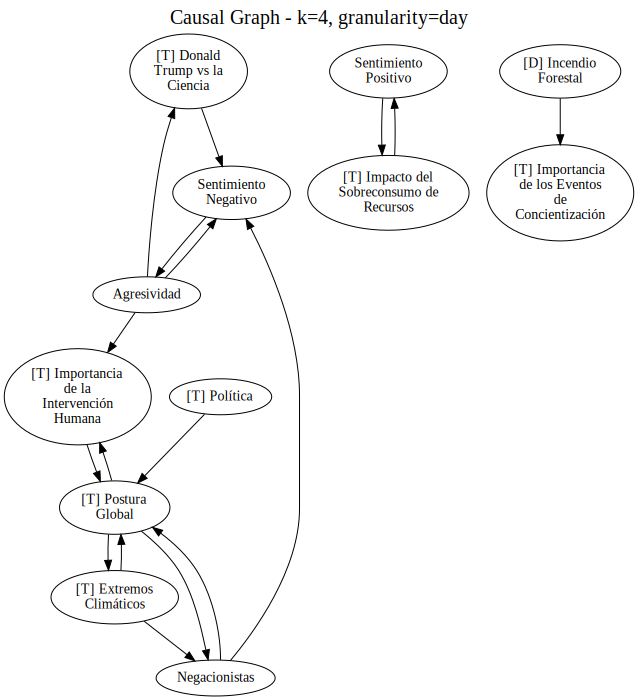

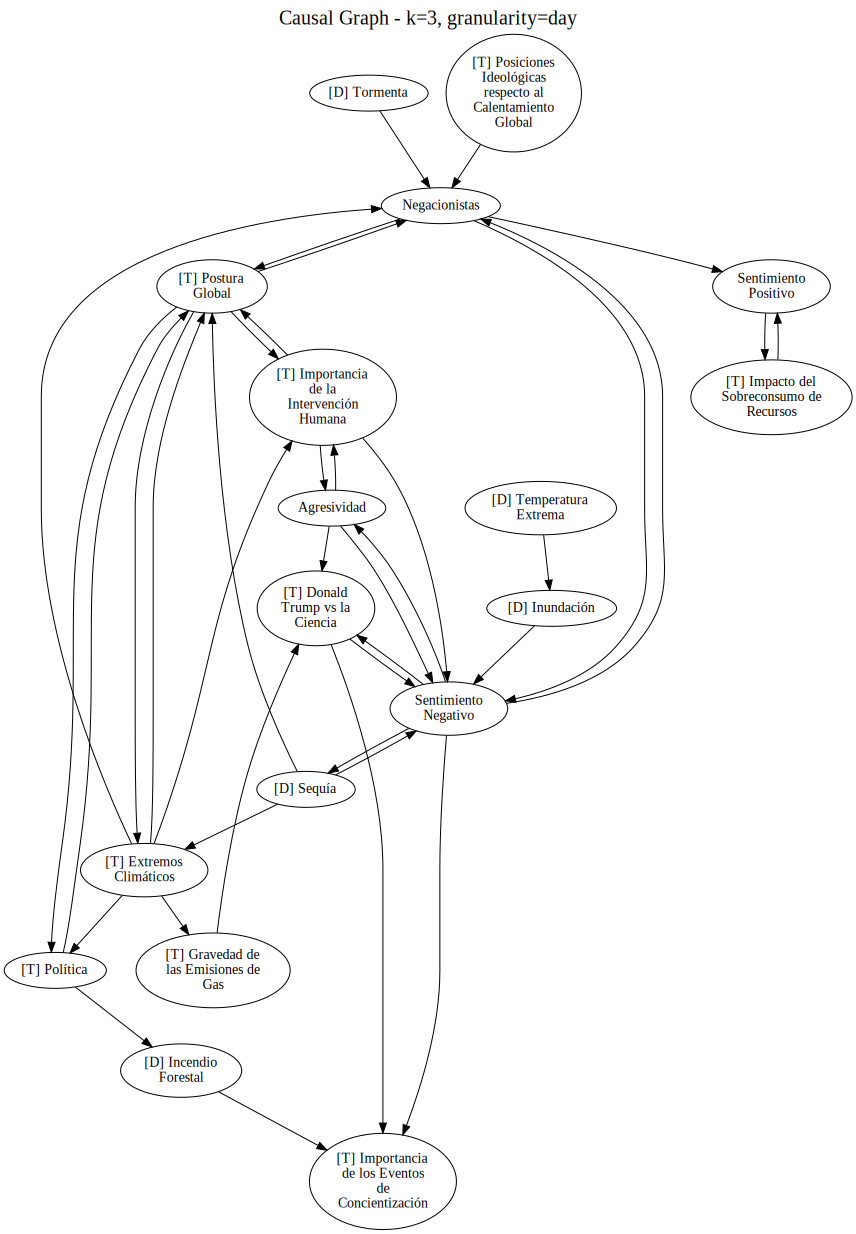

In [ ]:
for granularity in ["day"]:
  generateCausalGraph(ks=[4, 3], granularity=granularity)

# Tests

In [ ]:
def translate(term):
  terms = {
      "[T] Weather Extremes": "[T] Extremos Climáticos",
      "[T] Importance of Human Intervention": "[T] Importancia de la Intervención Humana",
      "[T] Seriousness of Gas Emissions": "[T] Gravedad de las Emisiones de Gas",
      "[T] Ideological Positions on Global Warming": "[T] Posiciones Ideológicas respecto al Calentamiento Global",
      "[T] Impact of Resource Overconsumption": "[T] Impacto del Sobreconsumo de Recursos",
      "[T] Global stance": "[T] Postura Global",
      "[T] Politics": "[T] Política",
      "[T] Significance of Pollution Awareness Events": "[T] Importancia de los Eventos de Concientización",
      "[T] Donald Trump versus Science": "[T] Donald Trump vs la Ciencia",
      "[T] Undefined / One Word Hashtags": "[T] Indefinido / Hashtags de Una Palabra",
      "[D] Drought": "[D] Sequía",
      "[D] Storm": "[D] Tormenta",
      "[D] Flood": "[D] Inundación",
      "[D] Extreme temperature": "[D] Temperatura Extrema",
      "[D] Wildfire": "[D] Incendio Forestal",
      "Positive Sentiment": "Sentimiento Positivo",
      "Negative Sentiment": "Sentimiento Negativo",
      "Neutral Sentiment": "Sentimiento Neutral",
      "Aggressiveness": "Agresividad",
      "Aggressive": "Agresivo",
      "Not Aggressive": "No Agresivo",
      "Believer": "Creyente",
      "Neutral": "Neutral",
      "Denier": "Negacionista",
      "Deniers": "Negacionistas"
  }

  return terms.get(term, term)

translate("Denier")

'Negacionista'